# Libraries

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors  
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

from sklearn import metrics 
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import linear_model

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.000000,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000,0
284803,172787.000000,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790000,0
284804,172788.000000,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.880000,0
284805,172788.000000,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000,0


In [ ]:
column_list = (list(df.columns))
print(column_list)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [ ]:
print("=============================================")
print("Data types of the columns in the data frame:", df.dtypes)
print("=============================================")
print("Shape of the data frame:", df.shape)
print("=============================================")
print("Information about the data frame:", df.info())
df.head()

Data types of the columns in the data frame: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Shape of the data frame: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


Handling missing values

In [ ]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Time,0,0.000000
V16,0,0.000000
Amount,0,0.000000
V28,0,0.000000
V27,0,0.000000
V26,0,0.000000
V25,0,0.000000
V24,0,0.000000
V23,0,0.000000
V22,0,0.000000


In [ ]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

print("==============================================")

classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(" Normal_share=",normal_share,"\n","Fraud_share=",fraud_share)
print("==============================================")

imbalance= (fraud_share/normal_share)*100
print(' Imbalance Percentage = ' + str(imbalance))

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %
 Normal_share= 99.82725143693798 
 Fraud_share= 0.1727485630620034
 Imbalance Percentage = 0.173047500131896


<Figure size 2000x600 with 0 Axes>

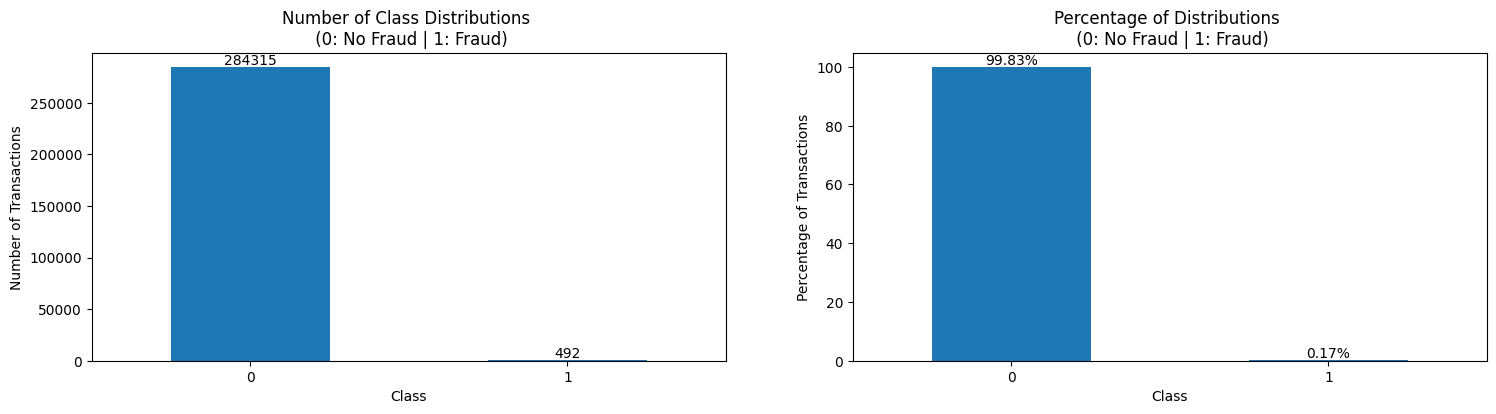

In [ ]:
plt.figure(figsize=(20,6), facecolor='m')

fig, ax = plt.subplots(1, 2, figsize=(18,4))

classes.plot(kind='bar', rot=0, ax=ax[0])
ax[0].set_title('Number of Class Distributions \n (0: No Fraud | 1: Fraud)')
ax[0].set_ylabel('Number of Transactions')
ax[0].set_xlabel('Class')
    
for i in ax[0].containers:
  ax[0].bar_label(i, label_type='edge', labels=i.datavalues.astype(int))

(classes/df['Class'].count()*100).plot(kind='bar', rot=0, ax=ax[1])
ax[1].set_title('Percentage of Distributions \n (0: No Fraud | 1: Fraud)')
ax[1].set_ylabel('Percentage of Transactions')
ax[1].set_xlabel('Class')

for i in ax[1].containers:
  ax[1].bar_label(i, label_type='edge', labels=[f'{val:.2f}%' for val in i.datavalues])

plt.show()

Time vs Class plot

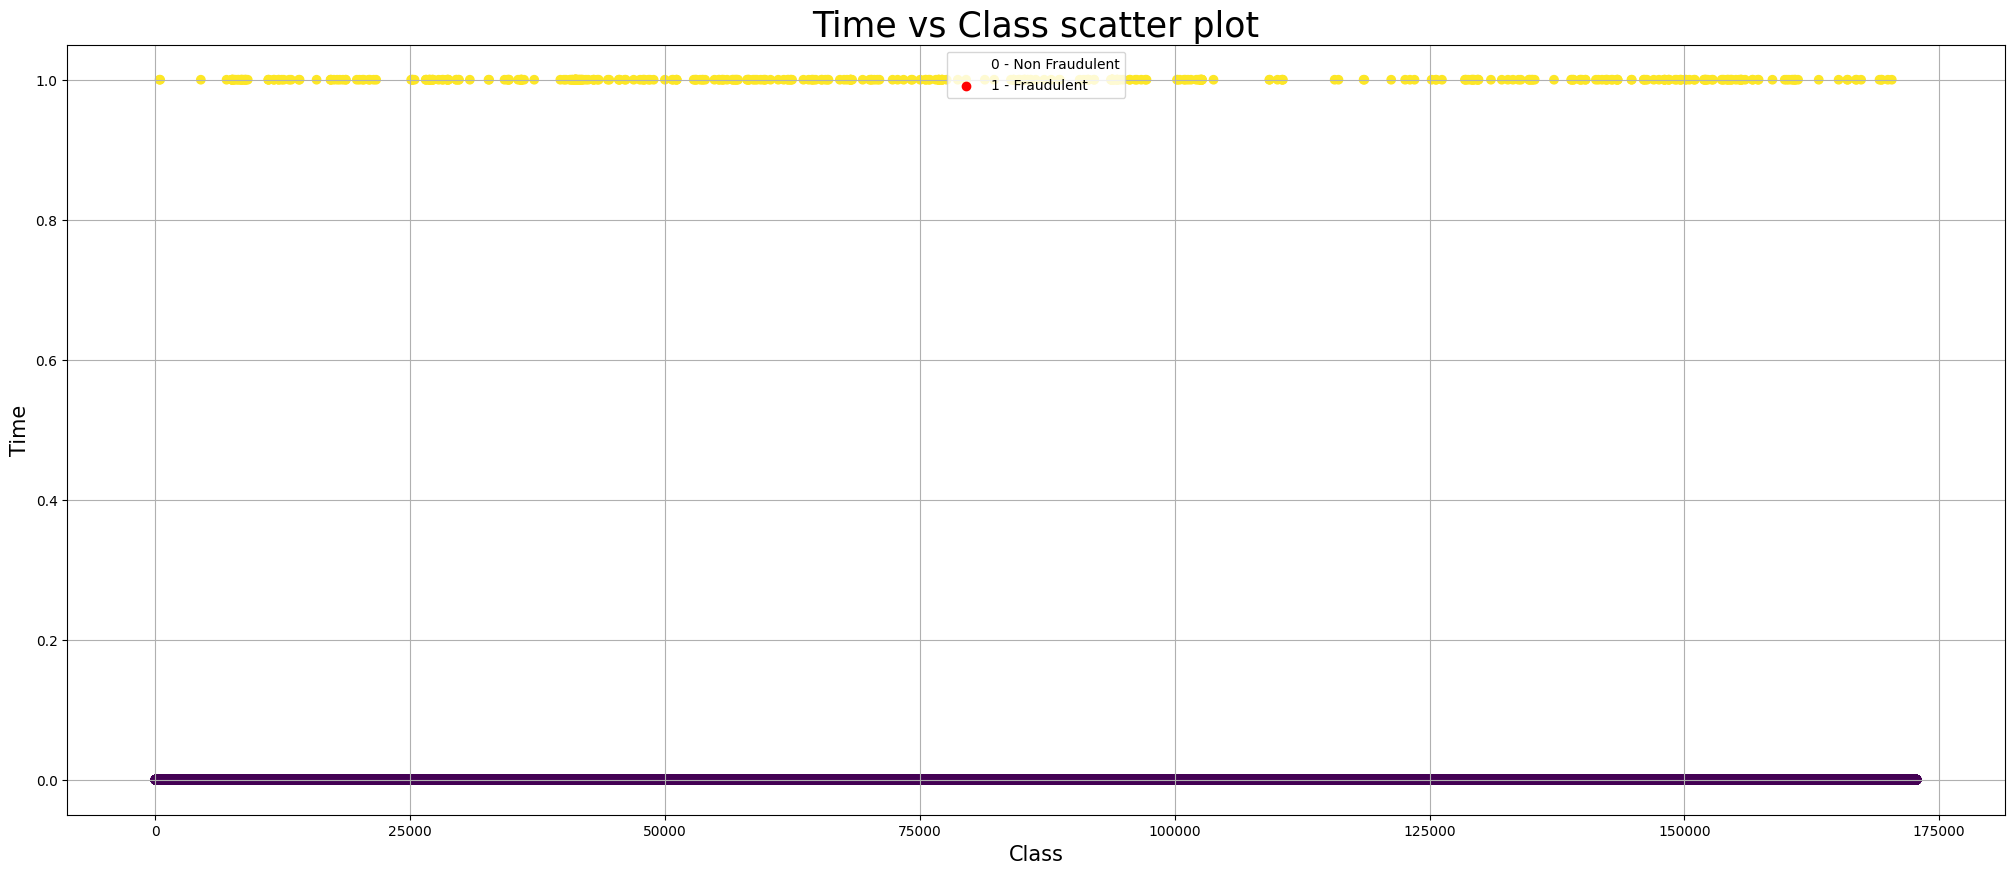

In [ ]:
plt.figure(figsize=(25,10))
plt.scatter(x=df["Time"], y=df["Class"], c=df["Class"])

#plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad = 0.15)

plt.title("Time vs Class scatter plot", fontsize=25)
plt.xlabel("Class", fontsize=15)
plt.ylabel("Time", fontsize=15)
plt.grid()

legend_elements = [plt.scatter([],[], marker='o', color='white', label='0 - Non Fraudulent'),
                       plt.scatter([],[], marker='o', color='red', label='1 - Fraudulent')]
plt.legend(handles=legend_elements, loc='upper center')

plt.show()

Amount vs Class

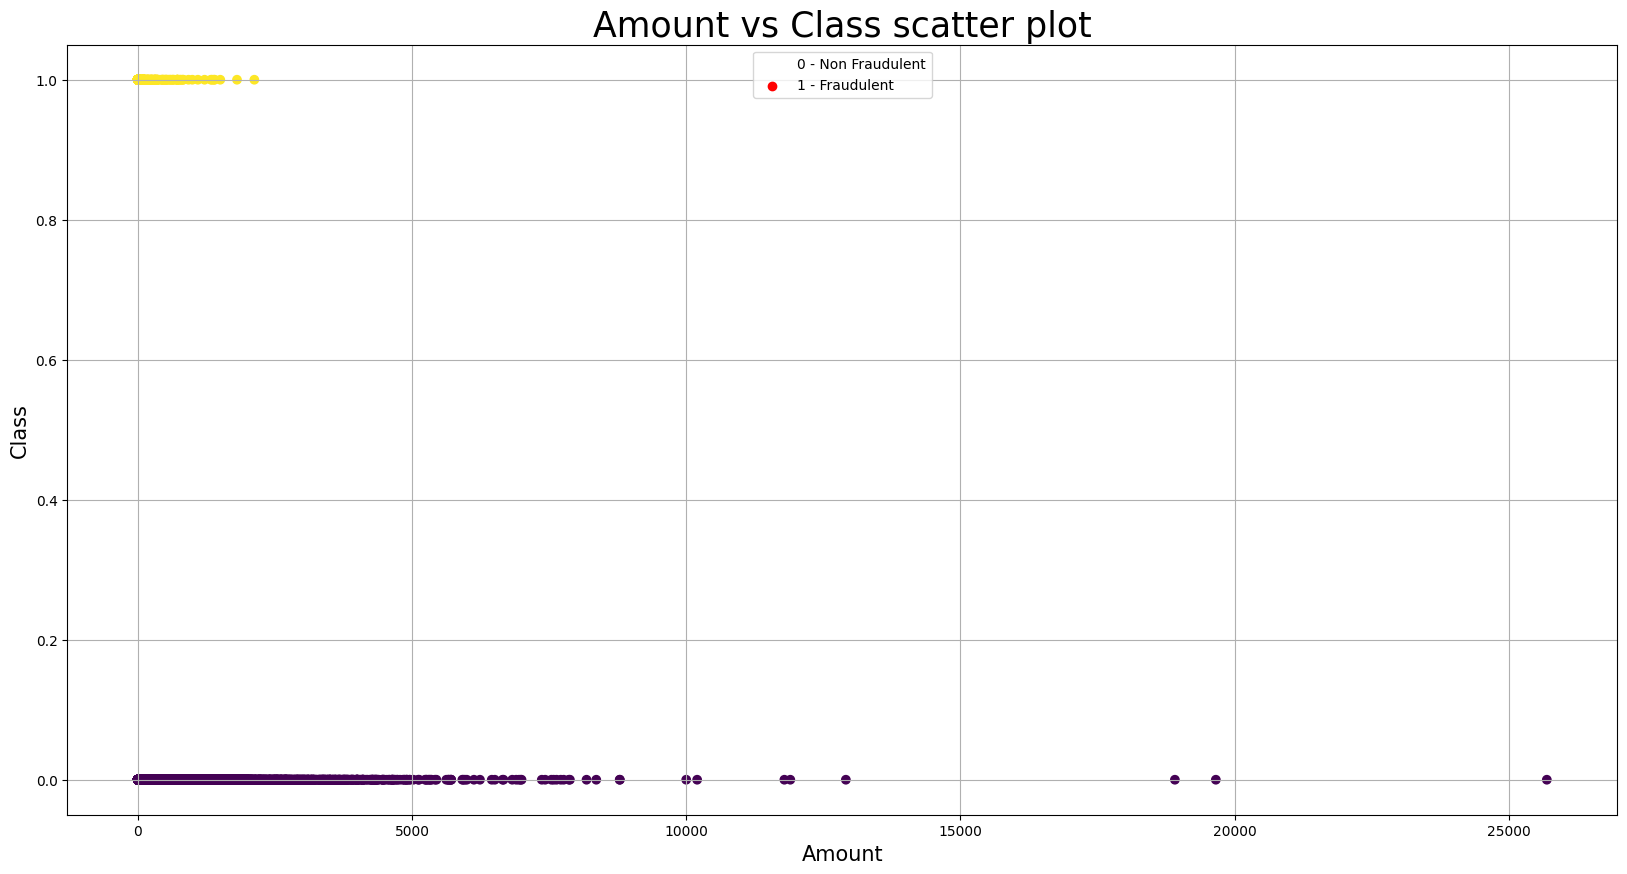

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x=df["Amount"], y=df["Class"], c=df["Class"])
#plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad = 0.15)

plt.title("Amount vs Class scatter plot", fontsize=25)
plt.ylabel("Class", fontsize=15)
plt.xlabel("Amount", fontsize=15)
plt.grid()

legend_elements = [plt.scatter([],[], marker='o', color='white', label='0 - Non Fraudulent'),
                       plt.scatter([],[], marker='o', color='red', label='1 - Fraudulent')]
plt.legend(handles=legend_elements, loc='upper center')

plt.show()

Correlation graph

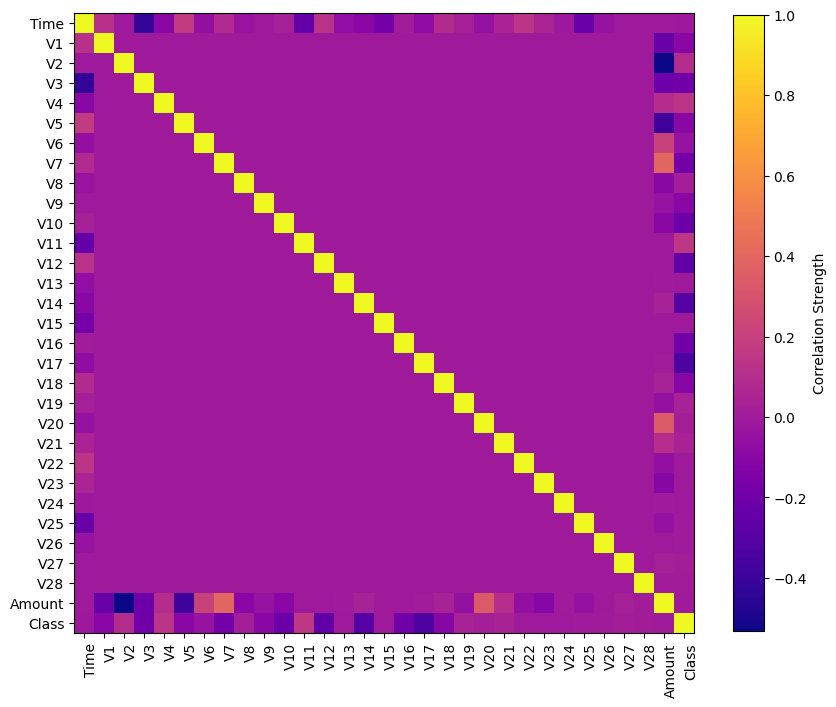

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(corr, cmap='plasma')
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.columns)
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
plt.colorbar(im, aspect=20, shrink = 0.80 , pad = 0.05, label='Correlation Strength')
plt.show()

# Model Building

In [ ]:
df = df.drop("Time", axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


Splitting the data into train & test data

In [ ]:
y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 29))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [ ]:
print(" Fraudulent Count for Full data : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data : ",np.sum(y_test))

 Fraudulent Count for Full data :  492
Fraudulent Count for Train data :  394
 Fraudulent Count for Test data :  98


In [ ]:
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Saved X_test & y_test")

Saved X_test & y_test


RobustScaler Scaler

In [ ]:
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.204315
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.264579
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,2.130828
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.221294
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,0.892136


In [ ]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,0.013918
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.141267
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,0.752540
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.292415
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.285317


Check skewness

In [ ]:
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

,Skewness
Features,
V1,-3.306334
V2,-4.779484
V3,-2.247962
V4,0.687574
V5,-2.786851
V6,1.937381
V7,3.152665
V8,-8.639485
V9,0.541869


In [ ]:
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

In [ ]:
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  # creates an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [ ]:
print(X_train_pt.shape)
print(y_train_pt.shape)

(227845, 29)
(227845,)


In [ ]:
# Class imbalance
print(y_train.value_counts()/y_train.shape)

from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold cross-validator
# perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

0   0.998271
1   0.001729
Name: Class, dtype: float64


Logistic Regression

======================================Logistic Regression Classifier:=======================================
C = 0.1 Penalty = L2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.2761640548706055 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 1.9589776992797852 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 2.0077414512634277 seconds
ROC-AUC Score for val data = 0.9797969874466093
Mean precision val score: 0.885478588591554
Mean recall val score: 0.6295975017349064
Mean f1 val score: 0.7341406860856002
------------------------------------------------------------------------------------------------------------
C = 0.5 Penalty = L2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.881828308

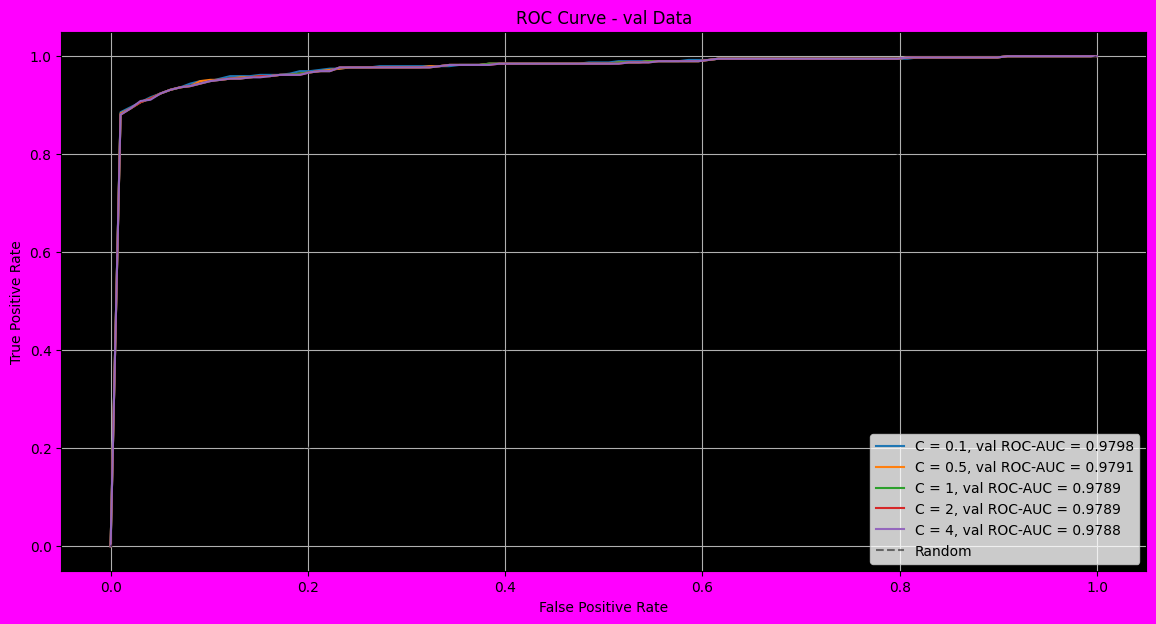

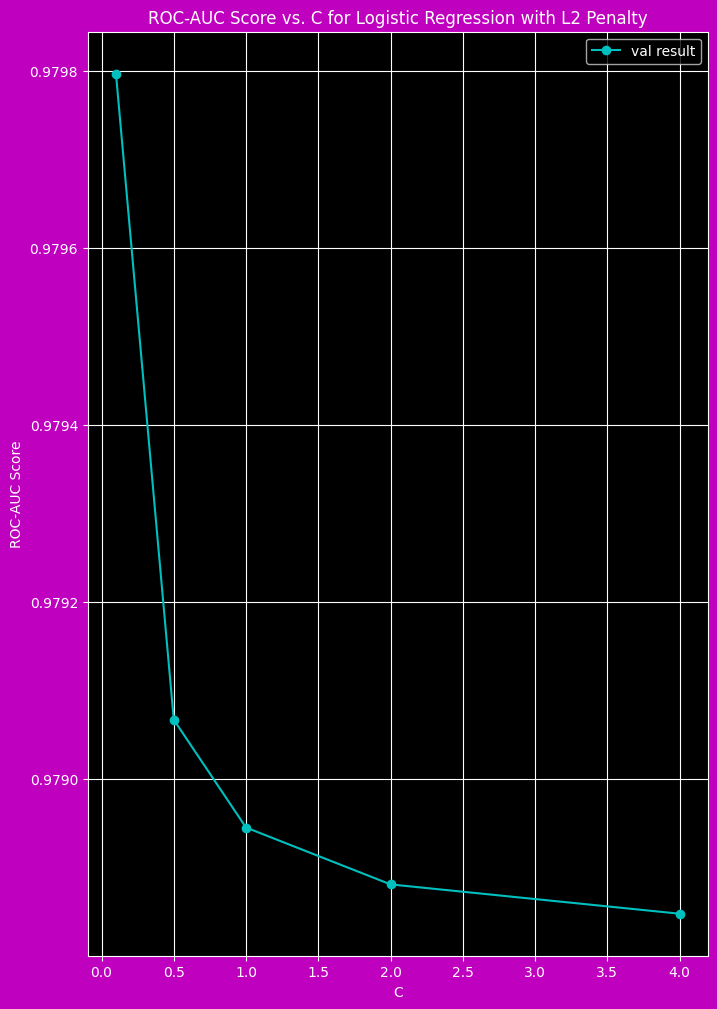





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of C: 
 [0.9797969874466093, 0.9790668817700007, 0.9789450373956186, 0.9788807735548114, 0.9788476359347289]
Best C: 0.1
Best Mean ROC-AUC score for val data: 0.9797969874466093
Mean precision val score for best C 0.885478588591554
Mean recall val score for best C 0.6295975017349064
Mean f1 val score for best C 0.7341406860856002




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("======================================Logistic Regression Classifier:=======================================")

# Define your values of C
C_values = [0.1, 0.5, 1, 2, 4]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation    
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)


        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))


        # precision_val.append(precision_score(y_val_cv, y_val_pred))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)

    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("===============================Logistic Regression Has Run Successfully:====================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for Logistic Regression with L2 Penalty')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])

print("============================================================================================================")
print("\n")
print("============================================================================================================")

Decision Tree

==============================================Decision Tree:================================================
Max Depth = 1
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.1132102012634277 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 1.164461374282837 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 1.2026386260986328 seconds
ROC-AUC Score for val data = 0.8260369152950421
Mean precision val score: 0.7687499999999999
Mean recall val score: 0.6524211581463489
Mean f1 val score: 0.7037697164558141
------------------------------------------------------------------------------------------------------------
Max Depth = 2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 2.441789150238037 seconds

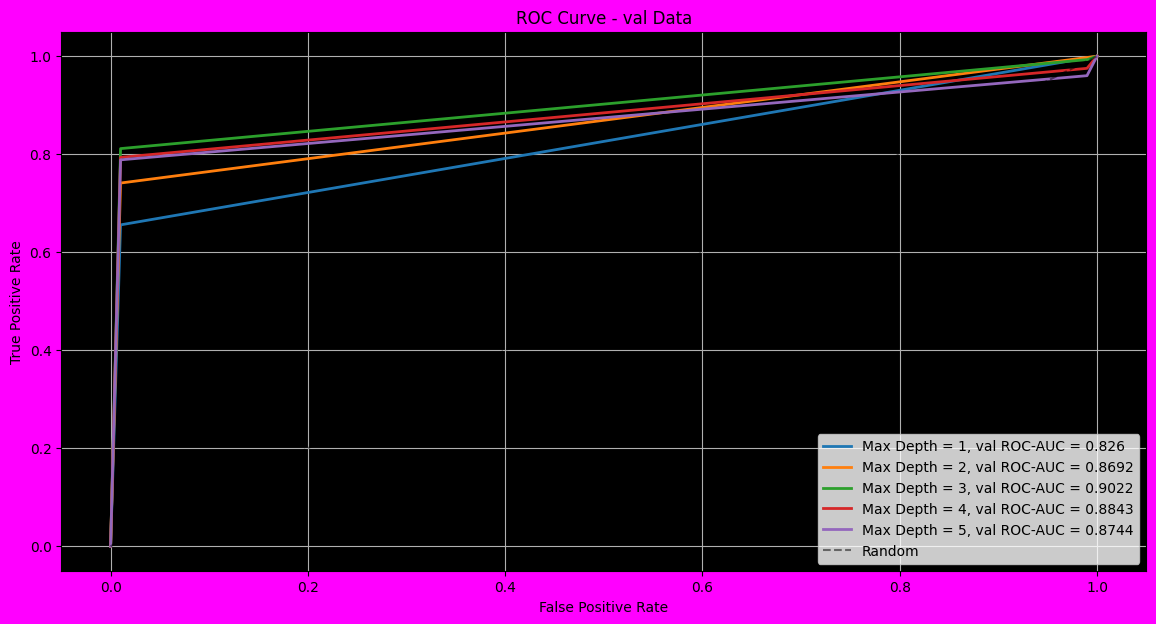

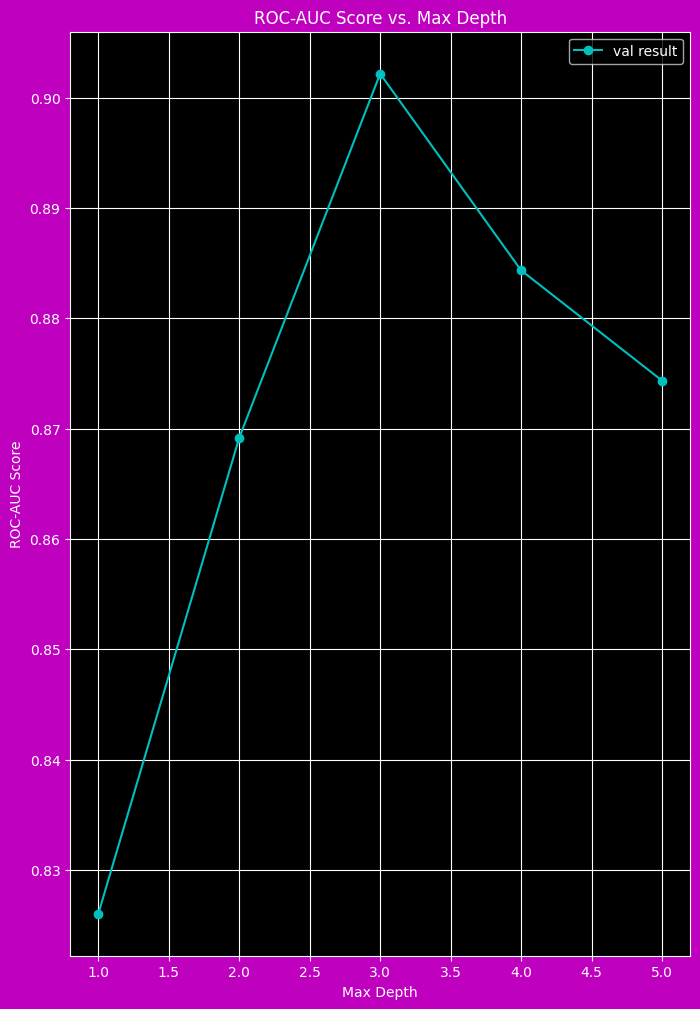





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Max Depth: 
 [0.8260369152950421, 0.8691790232260899, 0.9021670025441714, 0.8843493386433993, 0.8743589143179906]
Best Max Depth: 3
Best Mean ROC-AUC score for val data: 0.9021670025441714
Mean precision val score for best C 0.8495867768595042
Mean recall val score for best C 0.7107332870691648
Mean f1 val score for best C 0.7727373552241201




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("==============================================Decision Tree:================================================")


# Define your values of max_depth
max_depth_values = [1, 2, 3, 4, 5]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of max_depth
for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        # Create a decision tree classifier with the specified max_depth value
        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of Max Depth
print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Max Depth:", best_max_depth)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

Random Forest

================================================Random Forest:==============================================
n_estimators = 10
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 23.157485485076904 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 19.36783528327942 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 19.746029138565063 seconds
ROC-AUC Score for train data = 0.9999993715361274
ROC-AUC Score for val data = 0.9298061366567372
------------------------------------------------------------------------------------------------------------
n_estimators = 50
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 102.57000994682312 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 759

KeyboardInterrupt: ignored

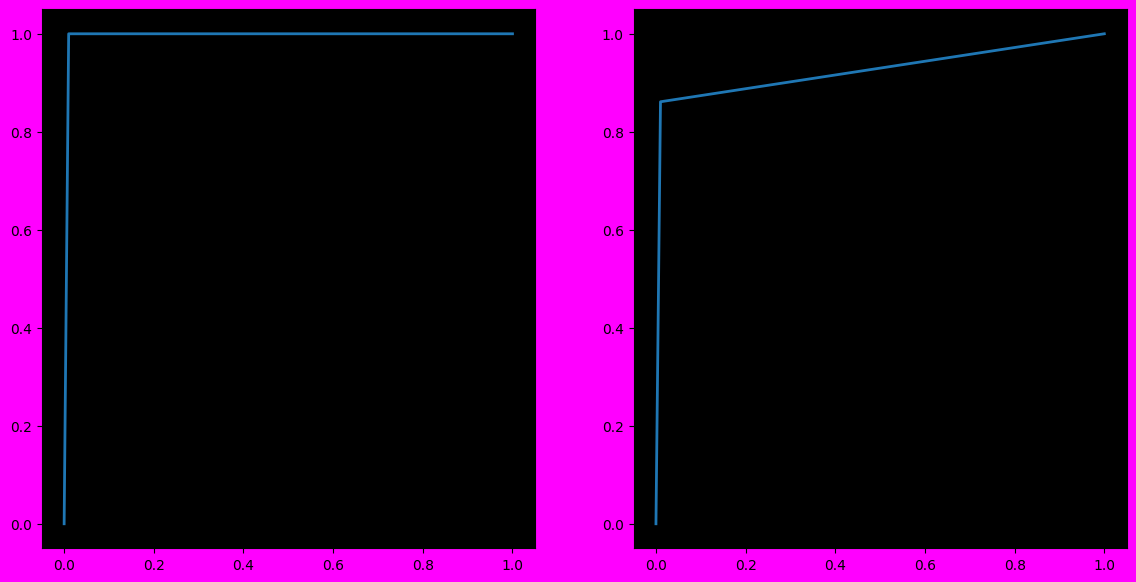

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier




print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Define your values of n_estimators
n_values = [10, 50, 100, 200, 400]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax1.set_facecolor('black')
ax2.set_facecolor('black')


# Loop through each value of n_estimators
for n in n_values:
    print("n_estimators =", n)
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = rf_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0] = 0.0
        fprs_train.append(fpr_train)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for train and val data
    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for train data =", mean_roc_auc_train)
    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax1.plot(mean_fpr, np.mean(tprs_train, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', Train ROC-AUC = ' + str(round(mean_roc_auc_train, 4)))
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax1.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve - Train Data')
ax1.legend(loc="lower right")
ax1.grid(True)  # Add grid to the plot

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(n_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    # plt.xscale('log')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of n Estimators
print("Mean ROC-AUC scores for train data for all values of n Estimators: \n", mean_roc_auc_scores_train)
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_n_estimators = n_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best n Estimators:", best_n_estimators)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)



print("============================================================================================================")
print("\n")
print("============================================================================================================")

In [ ]:
X_test_saved.head()
y_test_saved.head()
scaler = RobustScaler()

# Transforming the test data
X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# initialise the model with optimum hyperparameters
start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=0.01)  
clf.fit(X_train_pt, y_train_pt)

# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", preci_sion)
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))




LogisticRegression ROC-AUC Score on Test Set = 0.9752271441778737
LogisticRegression F1-Score on Test Set = 0.5977011494252873
LogisticRegression Precision on Test Set = 0.4785276073619632
LogisticRegression Recall on Test Set = 0.7959183673469388
Time taken: 2.16 seconds


Random Oversampling

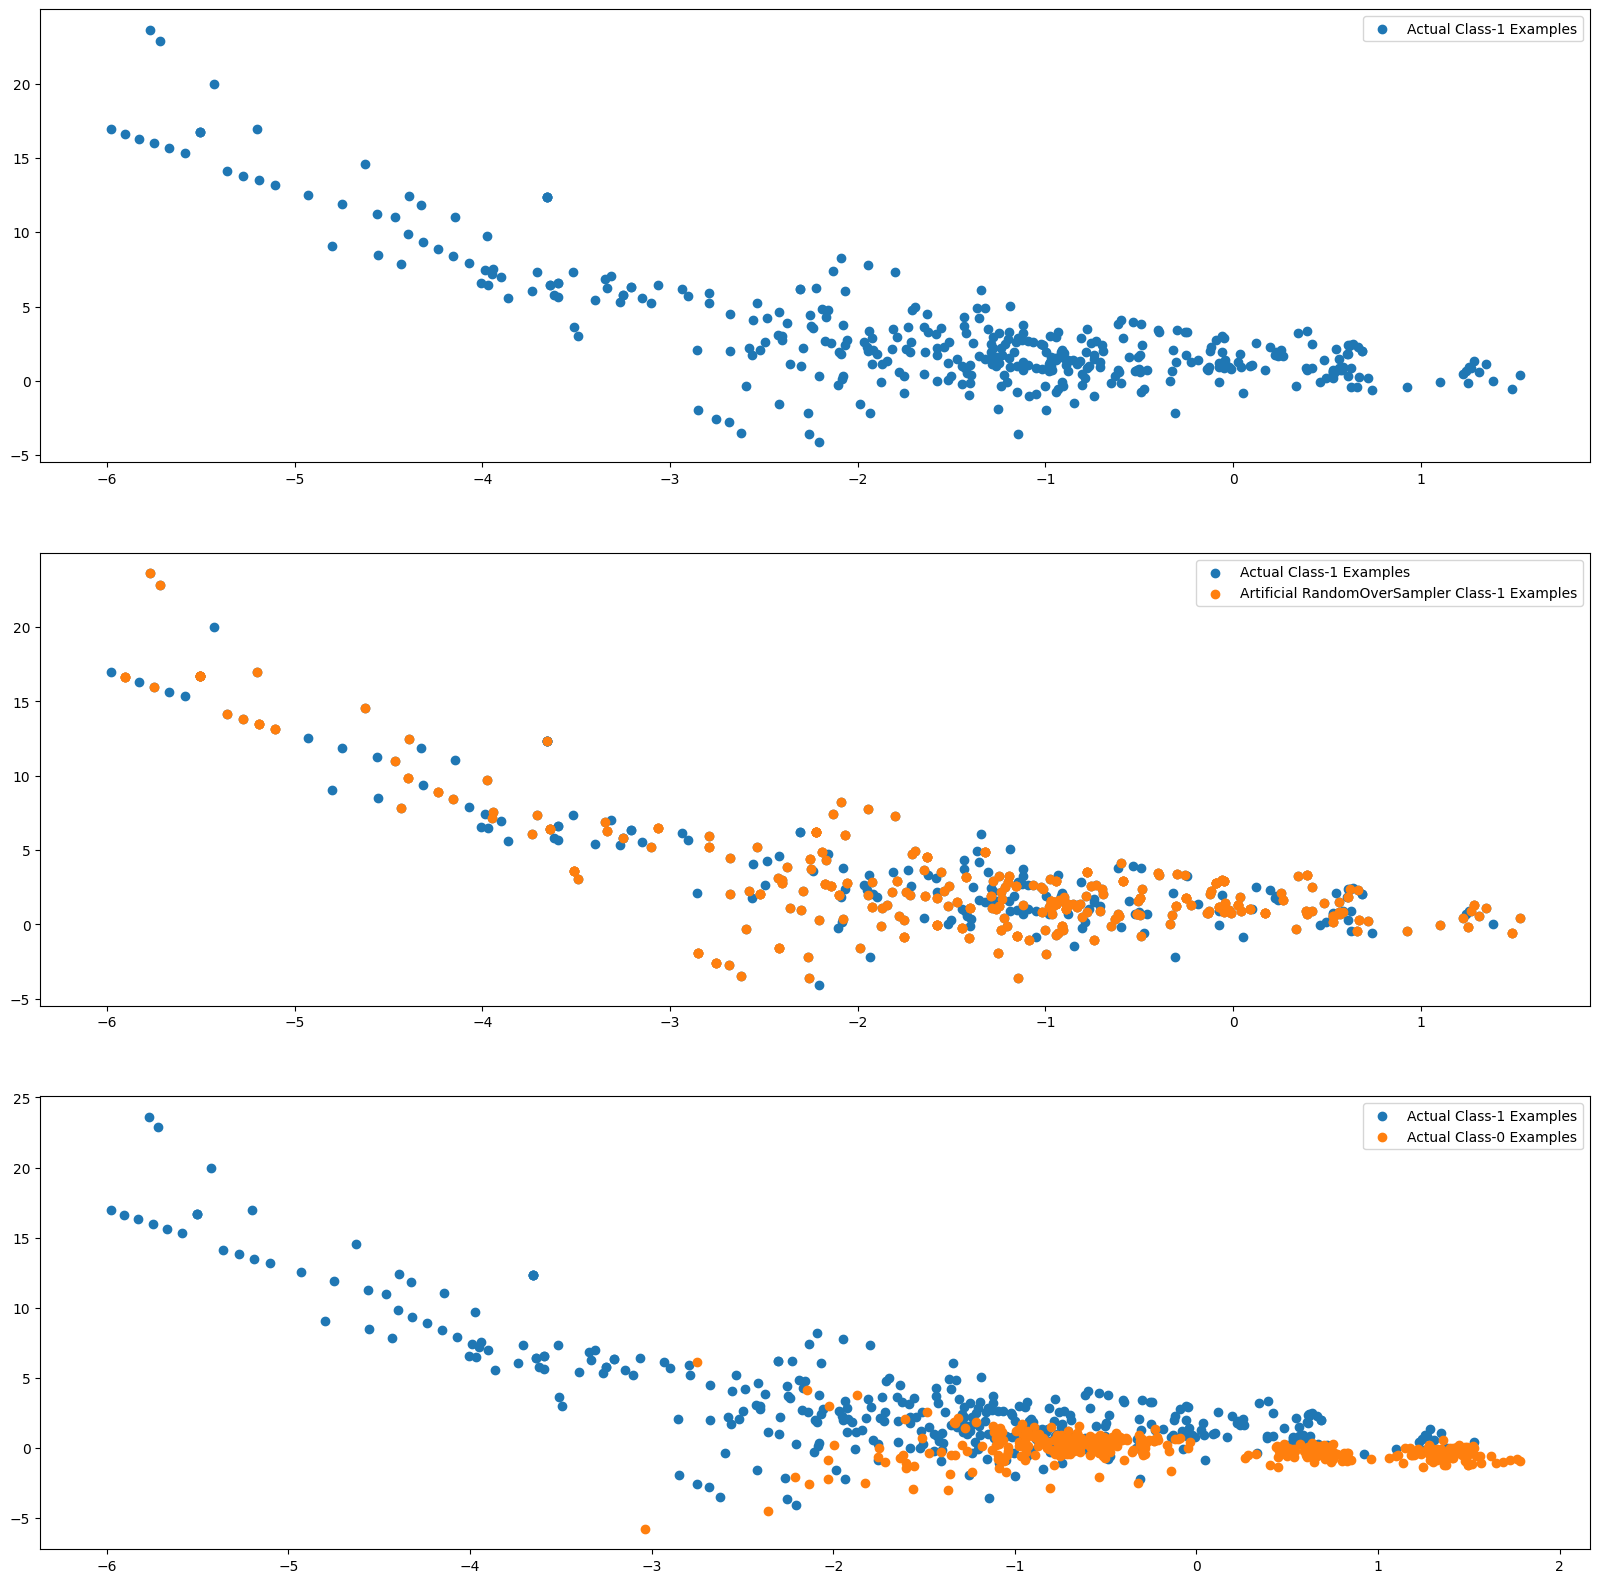

In [ ]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import RandomOverSampler

# Define the RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Resample the training data using RandomOverSampler
X_ros_train_pt, y_ros_train_pt = ros.fit_resample(X_train_pt, y_train_pt)

import warnings
warnings.filterwarnings("ignore")

# Artificial minority samples and corresponding minority labels from RandomOverSampler are appended
# below X_train_pt and y_train_pt respectively
# So to exclusively get the artificial minority samples from RandomOverSampler, we do
X_ros_train_pt_1 = X_ros_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_ros_train_pt_1[:X_train_pt_1.shape[0], 0], X_ros_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

======================================Logistic Regression Classifier:=======================================
C = 0.1 Penalty = L2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 5.04577374458313 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 7.518430709838867 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 6.26909613609314 seconds
ROC-AUC Score for val data = 0.9884596673443647
Mean precision val score: 0.971995125195427
Mean recall val score: 0.9294177647053652
Mean f1 val score: 0.9502289914447828
------------------------------------------------------------------------------------------------------------
C = 0.5 Penalty = L2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 6.08

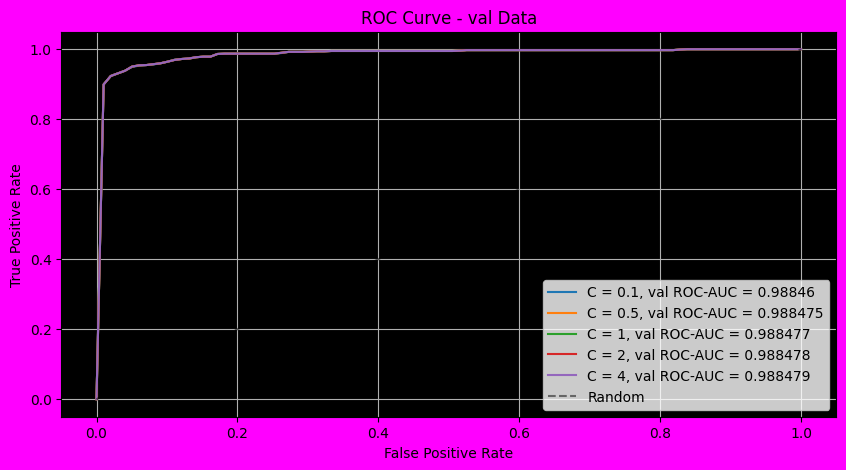

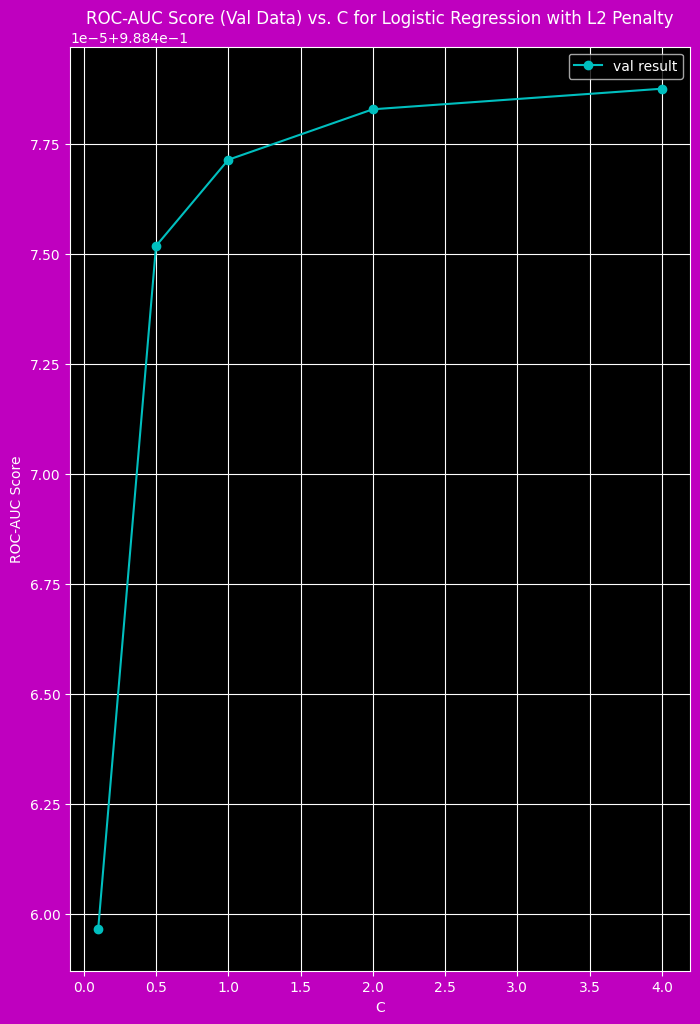





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of C: 
 [0.9884596673443647, 0.9884751736875929, 0.9884771319758253, 0.9884782784761702, 0.9884787455195051]
Best C: 4
Best Mean ROC-AUC score for val data: 0.9884787455195051
Mean precision val score for best C 0.9719371184117677
Mean recall val score for best C 0.9294177647053652
Mean f1 val score for best C 0.950201240931848
------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import time

print("============================================================================================================")

print("======================================Logistic Regression Classifier:=======================================")

# Define your values of C
C_values = [0.1, 0.5, 1, 2, 4]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)

    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)))


print("================================Logistic Regression Has Run Successfully:===================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for Logistic Regression classifier for val data
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. C for Logistic Regression with L2 Penalty')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for  and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")


print("\n")
print("============================================================================================================")

In [ ]:
X_test_saved.head()
y_test_saved.head()
scaler = RobustScaler()

# Transforming the test data
X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

X_test_saved.head()

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_test_saved_ros, y_test_saved_ros = ros.fit_resample(X_test_saved,y_test_saved)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# initialise the model with optimum hyperparameters
start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=0.01)  
clf.fit(X_ros_train_pt, y_ros_train_pt)

# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", preci_sion)
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))


print("============================================================================================================")



LogisticRegression ROC-AUC Score on Test Set = 0.9714047244524862
LogisticRegression F1-Score on Test Set = 0.932017141909525
LogisticRegression Precision on Test Set = 0.925193643972344
LogisticRegression Recall on Test Set = 0.9389420371412492
Time taken: 6.71 seconds
